In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')


In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [12]:

x = Flatten()(mobilnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
model = Model(inputs=mobilnet.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
from tensorflow.keras.layers import MaxPooling2D

In [16]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)             0

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [20]:
training_set

In [21]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 13s 1s/step - loss: 0.0116 - accuracy: 0.9976 - val_loss: 0.2078 - val_accuracy: 0.9552
Epoch 2/50
13/13 [==============================] - 14s 1s/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 0.1612 - val_accuracy: 0.9627
Epoch 3/50
13/13 [==============================] - 14s 1s/step - loss: 0.0183 - accuracy: 0.9976 - val_loss: 0.2298 - val_accuracy: 0.9552
Epoch 4/50
13/13 [==============================] - 14s 1s/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.1598 - val_accuracy: 0.9627
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.9627
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.1418 - val_accuracy: 0.9627
Epoch 7/50
13/13 [==============================] - 14s 1s/step - loss: 0.0360 - accuracy: 0.9904 - val_loss: 0.1692 - val_accuracy: 0.9478
Epoch 8/50
13/13 [==

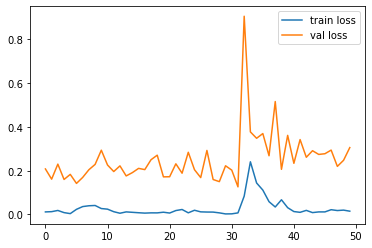

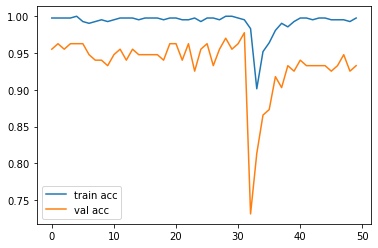

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [30]:
y_pred = model.predict(test_set)

In [31]:


y_pred



array([[8.1867905e-04, 9.9918133e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.6632816e-26],
       [2.2740952e-04, 9.9977261e-01],
       [5.4819928e-03, 9.9451798e-01],
       [9.9997580e-01, 2.4224350e-05],
       [8.0128037e-04, 9.9919873e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4831027e-19],
       [1.0867321e-02, 9.8913270e-01],
       [1.1095533e-03, 9.9889046e-01],
       [1.0000000e+00, 9.1560276e-38],
       [1.2085243e-03, 9.9879152e-01],
       [1.0000000e+00, 5.7361458e-16],
       [1.0000000e+00, 1.2288198e-16],
       [1.0000000e+00, 5.1710238e-29],
       [7.7358948e-04, 9.9922645e-01],
       [1.0000000e+00, 5.3063427e-16],
       [2.5874347e-04, 9.9974126e-01],
       [1.0000000e+00, 5.0175190e-27],
       [1.0000000e+00, 3.7413815e-21],
       [1.0000000e+00, 3.6266569e-22],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 7.1539426e-21],
       [8.6275407e-04, 9.

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_vgg19.h5')

In [36]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [37]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

In [43]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
